# Descenso del gradiente

El descenso del gradiente es un método numérico que nos ayuda a encontrar puntos críticos de una función. 
En este caso será utilizado para optimizar funciones que a su vez forman parte de la descripción de modelos.

En esencia el método consiste en evaluar la función en los puntos de la forma:
$$\bar{x}=\bar{x}-\nabla \bar{x}$$

Iterando este proceso hasta encontrar el $\bar{x}$ deseado

### El caso más sencillo
Tomaremos el caso para una función f(x) con una sóla variable real.

Este algoritmo consta de los parámetros: $\eta$ el learning rate
$steps$ número de pasos
La función y su gradiente

In [4]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from time import time

In [5]:
#definimos la función y su derivada

f=lambda x: np.sin(x)
df=lambda x: np.cos(x)

#esta función parece tener un mínimo cerca de 5, trabajaremos en el intervalo [2.5,7.5]
#Tomamos un paso eta=0.2 y un valor inicial x en el intervalo


def grad(f,df,X0,eta,pasos):
    i=0
    A=np.arange(-5,6,0.05)
    #x=np.random.choice(A,1)
    x=X0
    #para visualizar los pasos guardamos los [x,f(x)] en un arreglo
    X=[x]
    Y=[f(x)]
    #Hacemos las iteraciones hasta que f'(x)<10^-6
    while True:
        i=i+1
        x=x-eta*df(x)
        df(x)
        X.append(x)
        Y.append(f(x))
        if abs(df(x))<10e-5 or i>pasos: break
    plt.plot(X,Y,'o-b', label='Descenso del gradiente')
    plt.plot(A,[f(y) for y in A],'r',label='Función original')
    plt.grid()
    plt.legend()
    print('El valor óptimo para f es %.2f' %x)



El valor óptimo para f es 4.62


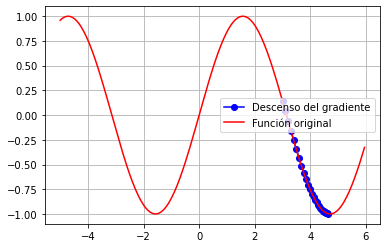

In [6]:
grad(f,df,3,0.1,30)

###### Learning rate demasiado pequeño
Hacer un learning rate demasiado pequeño puede no ser óptimo para el algoritmo, pues tardaría demasiado en converger a la solución, o incluso quedarse sin terminar el proceso

El valor óptimo para f es 4.08


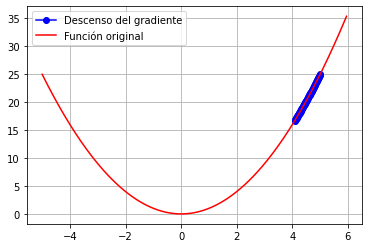

In [7]:
f= lambda x:x**2
df= lambda x:2*x
grad(f,df,5,0.001,100)

##### Learning rate demasiado grande

Por el contrario, un eta demasiado grande provoca que la función oscile al rededor de la solución o que de saltos hacia valores no deseados

El valor óptimo para f es -1.64


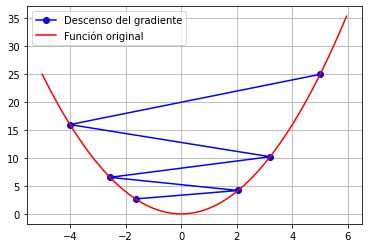

In [8]:
grad(f,df,5,0.9,4)

### Multivariables
Vamos a definir Descenso del gradiente para una función de varias variables.
Tomaremos $$f(x_1,x_2)=x_1^2+2x_2^2$$

In [9]:
#definimos la función 
def h(X):
    return X[0]**2 + 2*X[1]**2
def gradh(X):
    dh=np.array([2*X[0],4*X[1]])
    return dh
#hacemos las iteraciones
def desgrad(f,df,X0):
    i=0
    A=np.arange(-10,10)
    B=np.arange(-10,10)
    #tomamos un (x,y) aleatorio para empezar el proceso
    u,v=[X0[0]],[X0[1]]
    #Hacemos las iteraciones
    while True:
        i=i+1
        X0=X0-0.1*gradh(X0)
        u.append(X0[0])
        v.append(X0[1])
        if np.linalg.norm(gradh(X0))<1e-5 or i>30: break
    #Visualizamos el proceso
    X,Y=np.meshgrid(A,B)
    Z=X**2+2*Y**2
    plt.contour(X,Y,Z,cmap='viridis')
    plt.plot(u,v,'ro-')
    print("El X óptimo para f es:")
    print(round(X0[0]),round(X0[1]))


El X óptimo para f es:
-0.0 0.0


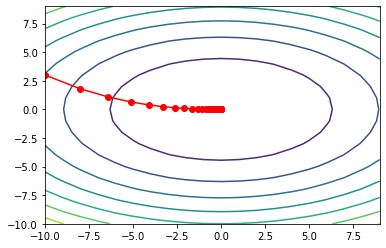

In [10]:
desgrad(f,df,[-10,3])

# Caso más general
Definiremos el Descenso del Gradiente para una función $$f:R^n------->R$$ Sin la necesidad de escribir su gradiente de manera explícita, con 
$$descenso_grad(f,X0,\eta,steps,tolerance)$$
Con f la función a optimizar, X0 el punto desde el cual se va a iniciar y $\eta$ la taza de aprendizaje

In [11]:
def partial(g, k, X):
    h = 1e-9
    Y = np.copy(X)
    X[k - 1] = X[k - 1] + h
    dp = (g(X) - g(Y)) / h
    return dp

def grad(f, X):
    grd = []
    for i in np.arange(0, len(X)):
        ai = partial(f, i + 1, X)
        grd.append(ai)
    return grd

#Damos el número de pasos, una tolerancia y el tamaño del paso
def descenso_grad(f,X0,eta, steps, tolerance=1e-7):
    #iteraciones
    i=0
    while True:
        i=i+1
        X0=X0-eta*np.array(grad(f,X0))

        if np.linalg.norm(grad(f,X0))<tolerance or i>steps: break
    return X0


Este primer algortimo es una aproximación decente para optimizar algunas funciones, por ejemplo la tratada en el ejemplo 2:

In [12]:
descenso_grad(h,[1,1],0.1,4000)

array([4.40087314e-08, 4.50000001e-09])


##### Pero falla para encontrar el valor óptimo en funciones más complejas o que toman valores muy grandes

In [13]:
def s(X):
    return (X[0]-110)**4 + (X[1]-6)**4

descenso_grad(s,[1,1],0.01,400)

array([-5.50911995e+12,  6.06639481e+00])

# Gradiente acotado
Para evitar divergencia en algunos casos vamos a definir una variante de la función $\textit{grad}$ donde acotaremos la norma del gradiente, disminuyendo el tamaño de las derivadas parciales 

In [14]:
#La parcial será la misma

def partial(g, k, X):
    h = 1e-9
    Y = np.copy(X)
    X[k - 1] = X[k - 1] + h
    dp = (g(X) - g(Y)) / h
    return dp

def gradcot(f, X, cota):
    grd = []
    for i in np.arange(0, len(X)):
        #aquí definiremos la cota para el gradiente 
        ai = partial(f, i + 1, X)
        if ai<0:
            ai = max(ai, -1*cota)
        else:
            ai = min(ai, cota)
        grd.append(ai)
    return grd

#Ahora el descenso del gradiente recibe la cota y una tolerancia, así como el número de pasos que queremos

def desgrad(f,X0,eta, steps, cota=100, tolerance=10e-8):
    i=0
    while True:
        i=i+1
        X0=X0-eta*np.array(gradcot(f,X0, cota))

        if np.linalg.norm(gradcot(f,X0, cota))<tolerance or i>steps: break
    return X0

In [15]:
desgrad(s,[1,1],0.01,120)

array([109.17949999,   5.66233982])

## Primer modelo
Vamos a tomar un conjunto de datos creados de manera sintética y utilizaremos el descenso del gradiente para optimizar un modelo que se ajuste a ellos.
Para el caso más sencillo utilizaremos una relación lineal entre las variables
Entonces tendremos un conjunto de datos de la forma:
$$y_1=x_1^1w_1+y_1=x_1^2w_2+ \cdots +x_1^mw_m$$
$$\vdots$$
$$y_n=x_n^1w_1+y_1=x_n^2w_2+ \cdots +x_n^mw_m$$


### Definiendo la función error
Para calcular el error en nuestro modelo de aproximación debemos calcular el error de aproximación por cada ejemplo y para el conjunto completo: la suma de estos.
Es decir la función de error para un conjunto de n ejemplos será:
$$Error=E(W,b)=\sum_{i=1}^{n}l_i(W,b)$$

Donde $l_i$ será el error de cada ejemplo, en este caso se tomará el error cuadrático medio.
Entonces:
$$l_i=\frac{1}{2}(\bar{y_i}-y_i)^2$$

Donde $\bar{y_i} será el valor estimado por nuestro modelo$
entonces para este caso la función error será 
$$l_i=\frac{1}{2}((w_1x_1^i+w_2x_2^i+b)-y_i)²$$

Y el error total
$$E(W,b)=\sum_{i=1}^{n}\frac{1}{2}((w_1x_1^i+w_2x_2^i+b)-y_i)²$$


# Caso trivial
Para comenzar vamos a hacer la aproximación de algunos datos a una recta 

In [37]:
x=np.arange(-10,10,0.5)
y=-3*x+6 #función original
ruido=np.random.normal(0,9,y.shape)
y=y+ruido
#agregamos una columna de 1 a x
x1=[]
for i in x:
    i=np.append(i,1.0)
    x1.append(i)
x1=np.array(x1)

#metemos ruido al arreglo y0

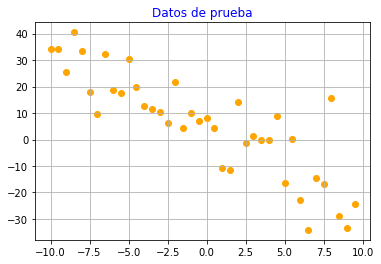

In [38]:
#Visualizamos los datos con los que trabajamos

plt.scatter(x,y,color='orange')
plt.title("Datos de prueba", color='b')
plt.grid()

In [39]:
#Definimos la función de error
def error(W):
    s=0
    for i in range(0,len(y)):
        l=0.5*(np.dot(x1[i],W)-y[i])**2
        s=s+l
    return s

La pendiente es -2.846120
La ordenada es 5.178864


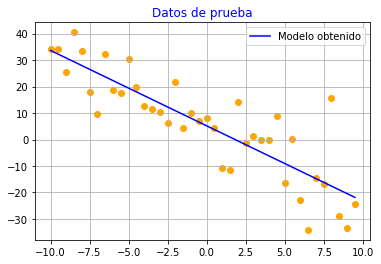

In [40]:
#Los valores al optimizar la función serán

m,b=desgrad(error,[1,1],0.001,200)
print("La pendiente es %f"%m)
print("La ordenada es %f"%b)

#Ahora que encontramos los valosres que buscamos graficamos

plt.scatter(x,y,color='orange')
plt.plot(x,m*x+b,'b',label='Modelo obtenido')
plt.title("Datos de prueba", color='b')
plt.grid()
plt.legend()

# Caso más complejo

In [41]:
#trabajamos en el dominio [-10,10]
#Incluimos a b en w, w=[w1,w2,...,b]
def datos_prueba(w,n):
    #n será el número de ejemplos
    #generamos el dominio de los datos, aleatorios con distribución normal
    X=np.random.normal(0,5,(n,len(w)-1))
    
    X1=[]
    for i in X:
        i=np.append(i,1.0)
        X1.append(i)
    X1=np.array(X1)
    Y = np.dot(X1, w) 
    Y=Y+np.random.normal(0.0,0.1,Y.shape)
    return X1,Y

#### Minibatch
Con el fin de ahorrar costo computacional sólo trabajaremos con un porcentaje del número total de ejemplos, a este subconjunto se le llama minibatch

In [42]:
def minibatch(size,X,Y):
    n=len(X)
    #tomamos la lista de índices de tamaño n
    indices=np.arange(0,n)
    indices=list(indices)
    #Tomamos una lista aleatoria de índices de tamaño=size
    ibatch=random.sample(indices, size)
    Xbatch=[]
    Ybatch=[]
    #Generamos las nuevas listas random
    for i in ibatch:
        Xbatch.append(X[i])
        Ybatch.append(Y[i])
        
    return np.array(Xbatch),np.array(Ybatch)
    

#### Aprendizaje


In [72]:
w=[0,1,2,3,4,5] #w real de la forma [w1,w2,...,wn,b] 

x1,y=datos_prueba(w,1000)# datos sintéticos
print("Los datos en X son:")
print(x1)

Los datos en X son:
[[ 2.05741449 -3.89251382  1.53405074 -2.31534509 -1.4114312   1.        ]
 [-1.54317455  6.93889593  7.4667546  -2.66630333 -2.88563701  1.        ]
 [ 4.12918023 -0.16273553  2.97441094 -7.3453742  -0.45389345  1.        ]
 ...
 [ 6.14171031 -1.09949508 -3.7273669  -0.54809065  5.3164134   1.        ]
 [ 3.11489363  7.56439292 -6.38570135 -2.93019757  1.53089429  1.        ]
 [ 2.26875041 -4.17033027 -2.33067834 -7.32940747  4.32774859  1.        ]]


#### Ahora usamos el descenso del gradiente para optimizar la función de error aplicada en estos datos y obtener W

In [71]:
desgrad(error,[1,1,1,1,1,1],0.001,40)

array([-0.05487951,  1.00915248,  2.06088041,  2.9160926 ,  3.90394869,
        4.99294484])